## Exploratory Data Analysis

Each row represents a customer, each column contains attributes related to customer demographics and previous transactions with the bank.

A Bank wants to take care of customer retention for their product; savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank. Your task as a data scientist would be to predict the propensity to churn for each customer.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Data/churn_prediction.csv")
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
customer_id                       28382 non-null int64
vintage                           28382 non-null int64
age                               28382 non-null int64
gender                            27857 non-null object
dependents                        25919 non-null float64
occupation                        28302 non-null object
city                              27579 non-null float64
customer_nw_category              28382 non-null int64
branch_code                       28382 non-null int64
days_since_last_transaction       25159 non-null float64
current_balance                   28382 non-null float64
previous_month_end_balance        28382 non-null float64
average_monthly_balance_prevQ     28382 non-null float64
average_monthly_balance_prevQ2    28382 non-null float64
current_month_credit              28382 non-null float64
previous_month_credit             28382 non-null

In [10]:
df.iloc[1]

customer_id                                   2
vintage                                     310
age                                          35
gender                                     Male
dependents                                    0
occupation                        self_employed
city                                        NaN
customer_nw_category                          2
branch_code                                3214
days_since_last_transaction                  60
current_balance                         5390.37
previous_month_end_balance              8704.66
average_monthly_balance_prevQ           7799.26
average_monthly_balance_prevQ2          12419.4
current_month_credit                       0.56
previous_month_credit                      0.56
current_month_debit                     5486.27
previous_month_debit                     100.56
current_month_balance                   6496.78
previous_month_balance                  8787.61
churn                                   

### Target Exploration
We are trying to predict if the client's account balance drops below the minimum balance prescribed for the customer.

Clearly, this is a binary classification problem. Let's look at the target variable and find out how many customers are in the churn category

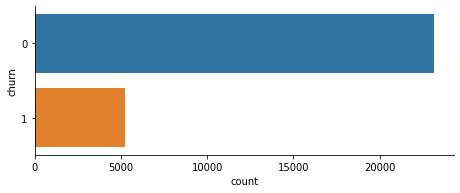

In [20]:
ax = sns.catplot(y="churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

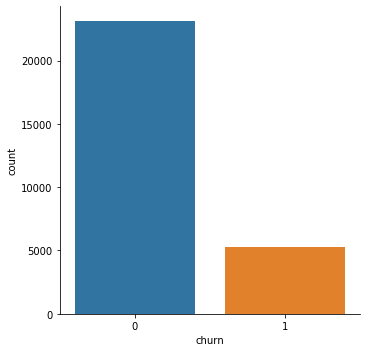

In [19]:
# vertical plot
ax = sns.catplot(x="churn", kind="count", data=df, orient='v')

In [24]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [21]:
df['churn'].value_counts(normalize = True)

0    0.814671
1    0.185329
Name: churn, dtype: float64

In [30]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


### Balance & Credit/Debit Features
We will start by looking at average balance in the current month. We will use a histogram to check its distribution.

#### Average Monthly Balance Features

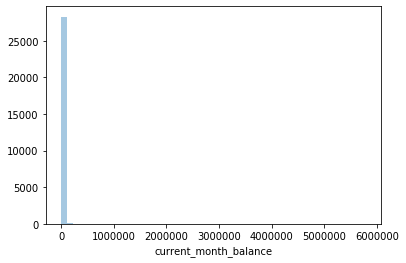

In [27]:
sns.distplot(df['current_month_balance'], kde = False)

plt.show()

Due to the huge outliers in both positive and negative directions, it is very difficult to derive insights from this plot.

- In this case, we could convert such columns to log and then check the distributions.
- However, since there are negative values, it cannot be a direct log conversion as log of negative numbers is not defined.
- To tackle this, we add a positive constant within the log as a correction

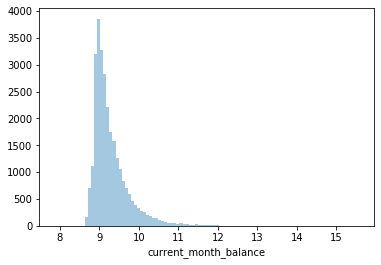

In [29]:
# To account for negative values we add a constant value within log
temp = np.log(df['current_month_balance'] + 6000) 

sns.distplot(temp, kde = False, bins = 100)

plt.show()

* Now, we can see more clearly that this is a right skewed feature and we have much more clarity on its distribution. Let us use subplot to quickly look at more numerical features together and see trends.

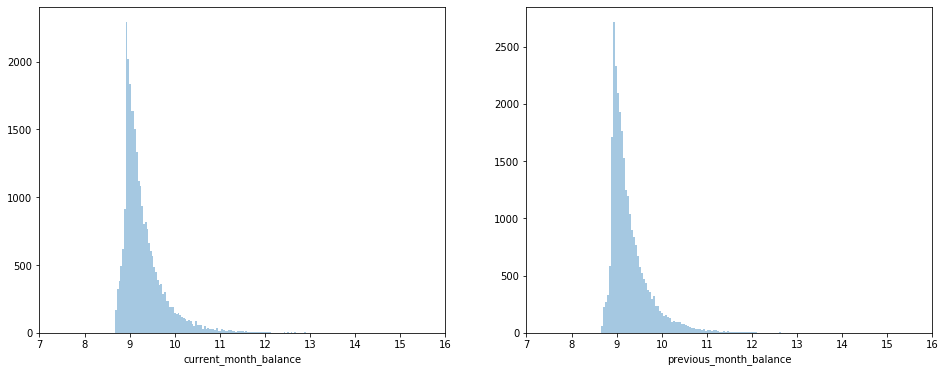

In [33]:
# Numerical Features
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
xmin = 7
xmax = 16
# Current Month Average Balance
temp = np.log(df['current_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax1.set_xlim([xmin,xmax])
ax1.set(xlabel='log of average balance of current month')
sns.distplot(temp, kde = False, bins = 200, ax = ax1)


# Previous month average balance
temp = np.log(df['previous_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax2.set_xlim([xmin,xmax])
ax2.set(xlabel='log of average balance of previous month')
sns.distplot(temp, kde = False, bins = 200, ax = ax2)


plt.show()

#### Current Balance today vs Average Monthly Balance in current month

As expected the average monthly balance for both months are quite similar and have right skewed histograms as shown. Now let us compare the current month average balance vs current balance as of today

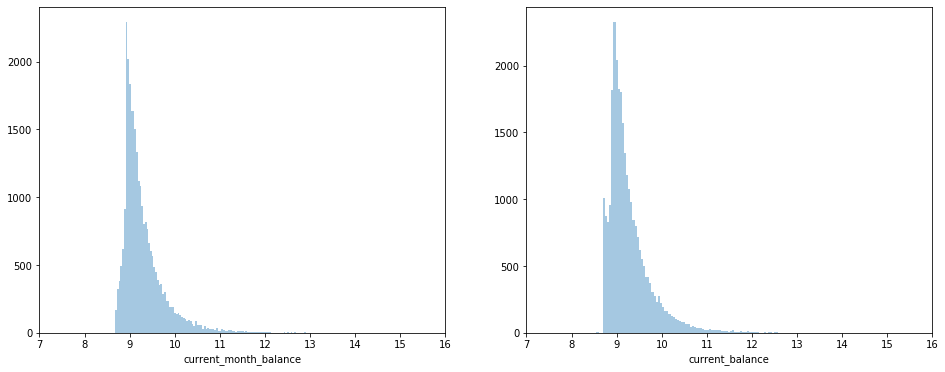

In [34]:
# Numerical Features
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
xmin = 7
xmax = 16
# Current Month Average Balance
temp = np.log(df['current_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax1.set_xlim([xmin,xmax])
#ax1.set(xlabel='log of average balance of current month')
sns.distplot(temp, kde = False, bins = 200, ax = ax1)


# Current End of month average balance
temp = np.log(df['current_balance'] + 6000) # To account for negative values we add a constant value within log
ax2.set_xlim([xmin,xmax])
#ax2.set(xlabel='log of month end balance of current  month')
sns.distplot(temp, kde = False, bins = 200, ax = ax2)


plt.show()

* Here, we can see that the distribution for both lie in almost the same interval, however, there are larger number of values for current balance just below 9 which might have been contributed by the churning customers. 

* It might be a good idea to create a feature which is the difference of these 2 variables during the model building process.

* You can do more univariate analysis on other balances and check distributions to find similar insights. 

Next, in order to understand which of these features might be important to predict the churn, we will do a bivariate analysis.

### Bivariate Analysis

Now, we will check the relationship of the numeric variables along with the target. Again conversion to log is important here as we have a lot of outliers and visualization will be difficult for it.

#### Churn vs Current & Previous month balances

In [36]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
df1 = pd.DataFrame()

for i in balance_cols:
    df1[str('log_')+ i] = np.log(df[i] + 6000)

log_balance_cols = df1.columns

In [37]:
df1['churn'] = df['churn']

We will use the brilliant pairplot function from Seaborn which supports displaying relationship between multiple variables. It displays the scatter plot between a pair of feature and also displays the distribution

Here I have included the following:
* Log of current balance & previous month end balance
* Log of average monthly balance of current and previous month
* Churn is represented by the color here (Orange - Churn, Blue - Not Churn)

In [40]:
df1.head()

,log_current_balance,log_previous_month_end_balance,log_current_month_balance,log_previous_month_balance,churn
0,8.917138,8.917138,8.917138,8.917138,0
1,9.340524,9.595920,9.433226,9.601545,0
2,9.201618,9.377150,9.306221,9.312007,0
3,9.023036,9.023036,9.023036,8.945045,1
4,8.843286,8.909468,8.875867,8.946005,1


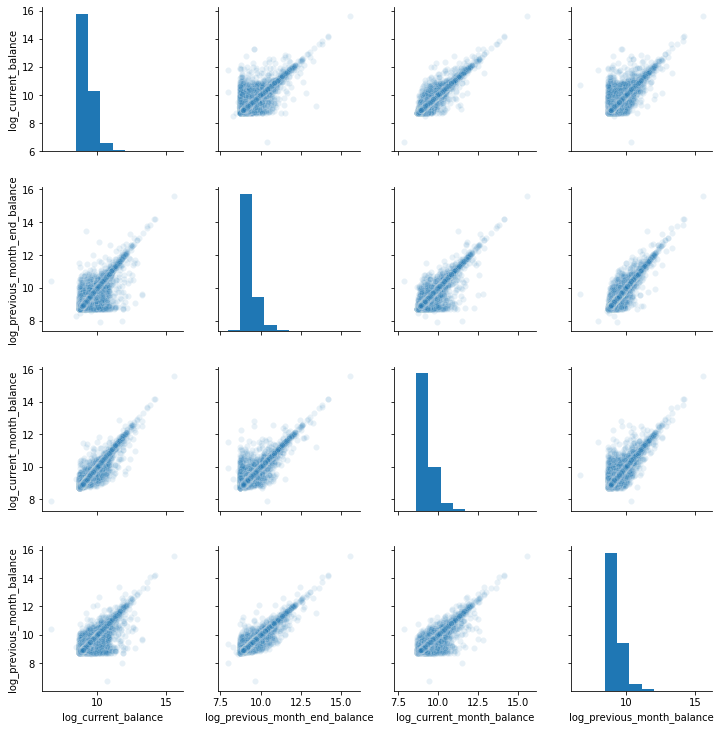

In [38]:
#sns.pairplot(df1,vars=log_balance_cols, hue = 'churn',plot_kws={'alpha':0.1})
df1_no_churn = df1[df1['churn'] == 0]
sns.pairplot(df1_no_churn,vars=log_balance_cols,plot_kws={'alpha':0.1})
plt.show()

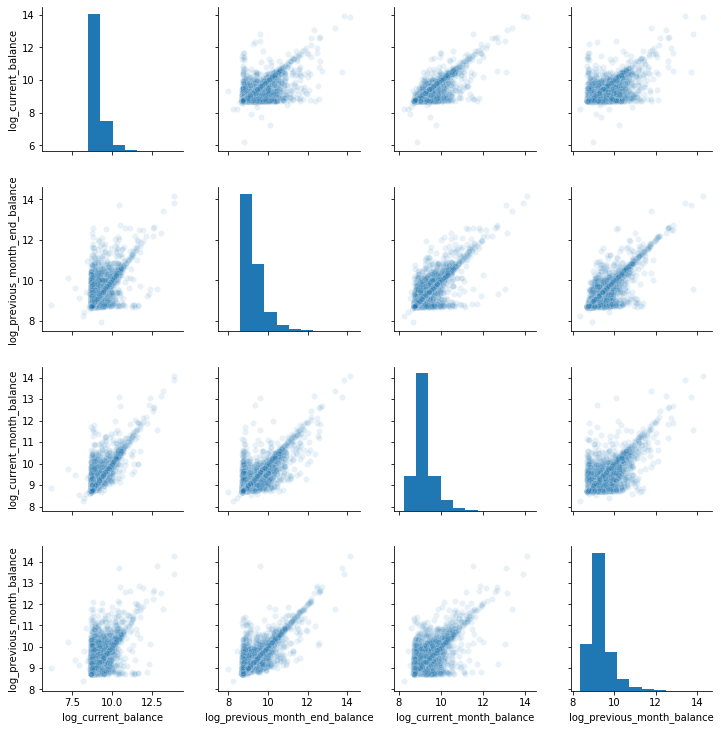

In [41]:
#sns.pairplot(df1,vars=log_balance_cols, hue = 'churn',plot_kws={'alpha':0.1})
df1_churn = df1[df1['churn'] == 1]
sns.pairplot(df1_churn,vars=log_balance_cols,plot_kws={'alpha':0.1})
plt.show()

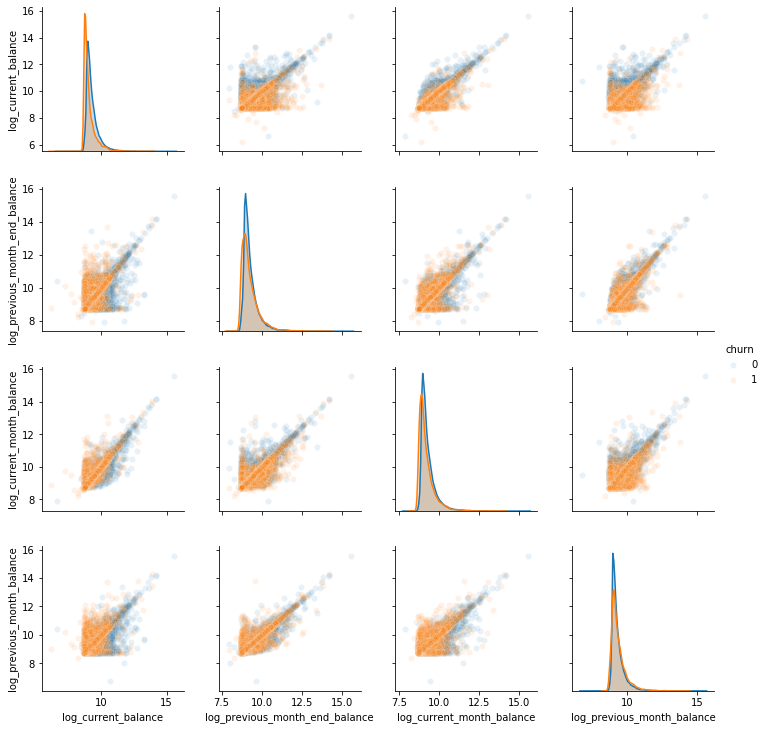

In [42]:
sns.pairplot(df1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

The distribution for these features look similar. We can make the following conclusions from this:
* There is high correlation between the previous and current month balances which is expected
* The lower balances tend to have higher number of churns which is clear from the scatter plots
* Distribution for the balances are all right skewed

### Credit and Debits for current and previous months

Total credit and debit amounts for the current and previous can be clubbed into the same category. Let us again use the pair plot to check distributions and scatter plots.

In [43]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
df1 = pd.DataFrame()

for i in cr_dr_cols:
    df1[str('log_')+ i] = np.log(df[i])

log_dr_cr_cols = df1.columns

In [44]:
df1['churn'] = df['churn']

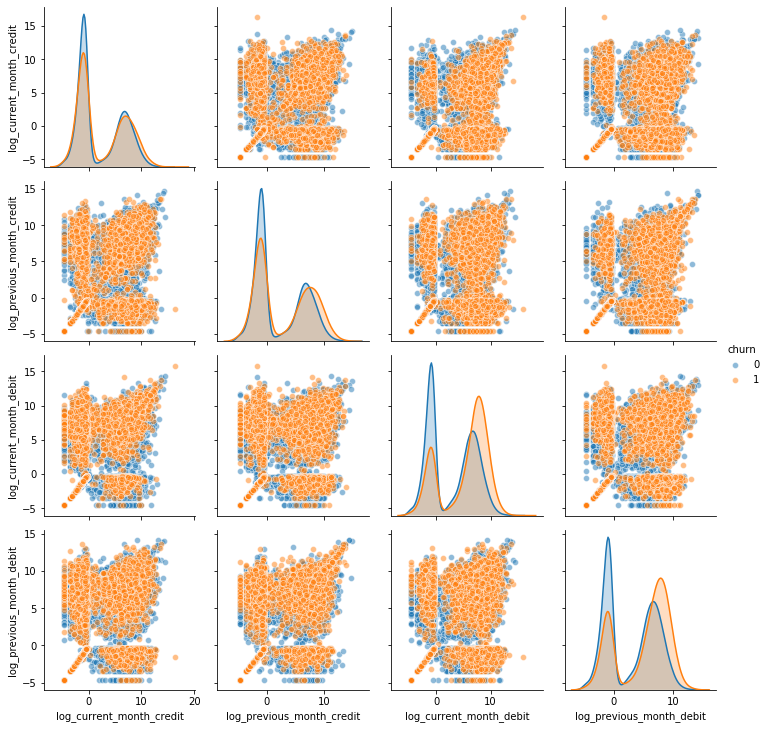

In [45]:
sns.pairplot(df1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature

### Average monthly balance of previous and previous to previous quarters

Now, these 2 variables present deeper historical transactions and would help in understanding the trend during the last 2 quarters

In [46]:
q_cols = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
df1 = pd.DataFrame()

for i in q_cols:
    df1[str('log_')+ i] = np.log(df[i] + 17000)

log_q_cols = df1.columns
df1['churn'] = df['churn']

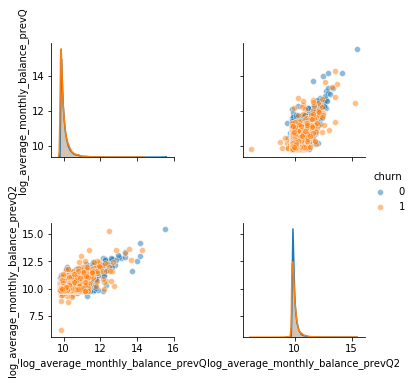

In [47]:
sns.pairplot(df1,vars=log_q_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

The distributions do not have much difference when it comes to churn. 


However, there are some high negative values in the previous to previous quarters due to which there appears to be a lateral shift. However, if you look at the x-axis, it is still at the same scale for both features.

Removing the extreme outliers from the data using the 1 and 99th percentile would help us look at the correct distributions

In [48]:
# Remove 1st and 99th percentile and plot

df2 = df[['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']]

low = .01
high = .99
quant_df = df2.quantile([low, high])
print(quant_df)

      average_monthly_balance_prevQ  average_monthly_balance_prevQ2
0.01                      1449.0377                        121.6485
0.99                     60118.2288                      59357.8810


In [49]:
df3 = df2.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [50]:
q_cols = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
df1 = pd.DataFrame()

for i in q_cols:
    df1[str('log_')+ i] = np.log(df3[i] + 17000)

log_q_cols = df1.columns
df1['churn'] = df['churn']

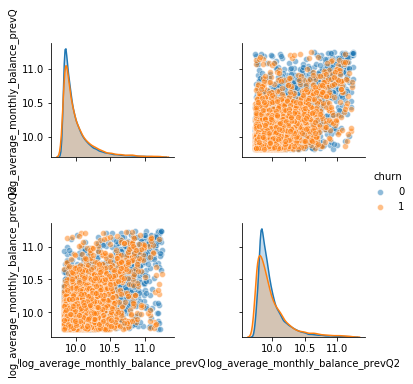

In [51]:
sns.pairplot(df1,vars=log_q_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Now, we can clearly see that the distributions are very similar for both the variables and and non churning customers have higher average monthly balances in previous 2 quarters

Now, that we have had a look at the balance features, its time to explore other numerical and ordinal features.

## Demographics and Bank Related Information for customers

Revisiting the description for numerical demographic & Bank related customer variables we have:

#### Numerical:

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year

#### Ordinal:

<b>dependents</b> - Number of dependents

<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

KDE plot can be used for numerical variables on the same axis to quickly compare the distributions for churning and non churning customers. It basically plots the approximate churn rate against each normal variable. This is exactly similar to what we did in the pairplot with distributions but here we would look at them separately since they represent entirely different variables

### Days Since Last Transaction

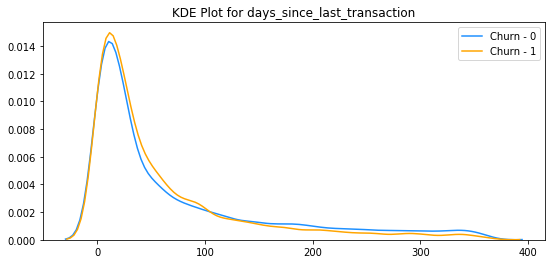

In [53]:
# KDE Plot Smoothens out even if there are no values for a value
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE Plot for {}".format(feature))
    ax0 = sns.kdeplot(df[df['churn'] == 0][feature].dropna(), color= 'dodgerblue', label= 'Churn - 0')
    ax1 = sns.kdeplot(df[df['churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn - 1')

kdeplot('days_since_last_transaction')

In [73]:
df2 = df[df["churn"]==1]
df3 = df2[df2["days_since_last_transaction"]<7]
df3.shape[0]/df2.shape[0]

0.16083650190114068

In [74]:
df2 = df[df["churn"]==0]
df3 = df2[df2["days_since_last_transaction"]<7]
df3.shape[0]/df2.shape[0]

0.1557391229132428

There is no significant difference between the distributions for churning and non churning customers when it comes to days since last transaction.

### Age & Vintage

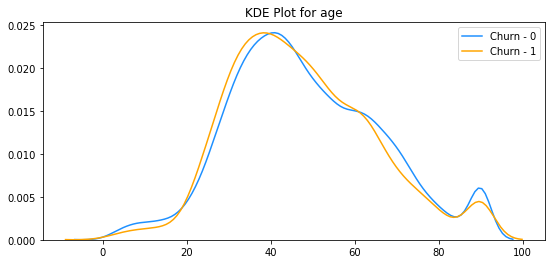

In [75]:
kdeplot('age')

Similarly, age also does not significantly affect the churning rate. However, customers above 80 years of age less likely to churn

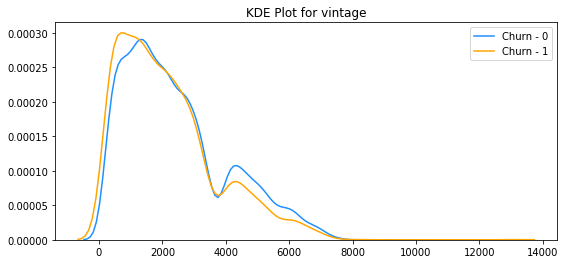

In [76]:
kdeplot('vintage')

For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 

<h2>Categorical features</h2>

This dataset has 4 categorical features (gender, occupation, city and branch code) as can be inferred from the data dictionary. Now let us have a look at the the number of unique values for each of them.


In [77]:
cat_cols = ['gender', 'occupation', 'city','branch_code']

for i in range(0,len(cat_cols)):
    print(str(cat_cols[i]) + " - Number of Unique Values: " + str(df[cat_cols[i]].nunique()))

gender - Number of Unique Values: 2
occupation - Number of Unique Values: 5
city - Number of Unique Values: 1604
branch_code - Number of Unique Values: 3185


So, there are a large number of unique values for branch code and city. Gender has 2 unique values while occupation has 7. 

### Univariate Analysis

Let us look at each categorical feature and check distribution

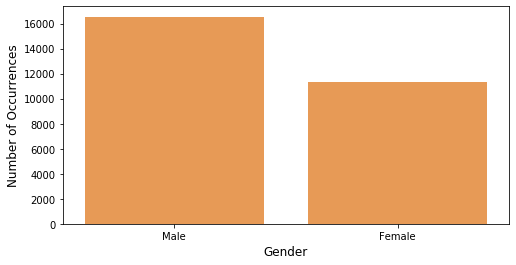

In [81]:
color = sns.color_palette()

int_level = df['gender'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

Amongst the customers, we have more males than females here. Lets check occupation now

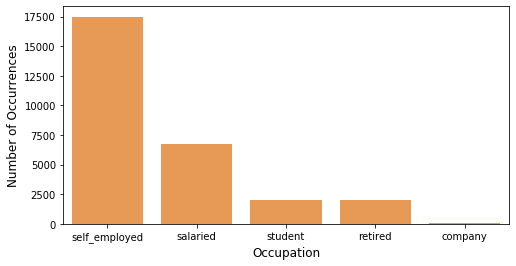

In [82]:
color = sns.color_palette()

int_level = df['occupation'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.show()

Most of the customers are self employed, followed by salaried account holders, retired custumors and very low number of companies.

Now, branch code and city code have a lot of unique values and direct visualization will be difficult. Lets see how:

### City Code & Branch Code

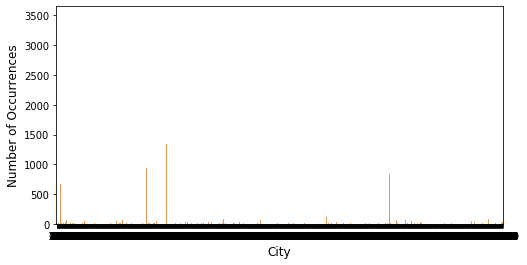

In [83]:
color = sns.color_palette()

int_level = df['city'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

Now, let us have a look at the frequencies of the top city codes:

In [228]:
df['city'].value_counts().head(20)

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
Name: city, dtype: int64

In [229]:
# Convert city variable wrt degree of number of customers
df['city_bin'] = df['city'].copy()
counts = df.city.value_counts()
df.city_bin[df['city'].isin(counts[counts > 900].index)] = 3
df.city_bin[df['city'].isin(counts[counts < 900].index) & df['city_bin'].isin(counts[counts >= 350].index)] = 2
df.city_bin[df['city'].isin(counts[counts < 350].index) & df['city_bin'].isin(counts[counts >= 100].index)] = 1
df.city_bin[df['city'].isin(counts[counts < 100].index)] = 0

df['city_bin'] = pd.to_numeric(df['city_bin'], errors='coerce')

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher

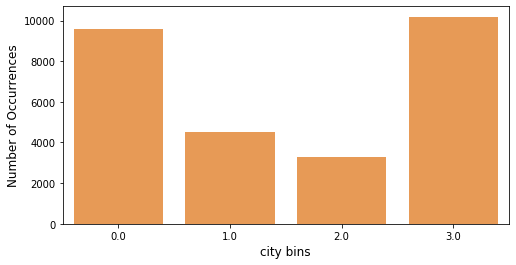

In [230]:
int_level = df['city_bin'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city bins', fontsize=12)
plt.show()

There are 2 major categories here. Cities with more than 900 occurances and with less than 100 occurances. Similarly we can create bins for branch id and have a look.

In [423]:
# Alternatively

bins= df["city"].value_counts()
city_bins = pd.cut(bins, [-1,100,350,900,3500], labels=[0,1,2,3])
merged = pd.merge(df, city_bins, left_on="city", right_index=True, how="left")
merged.head()

,customer_id,vintage,age,gender,dependents,occupation,city_x,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,city_bin,branch_bin,city_y
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0.0,0,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,NaN,0,NaN
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,3.0,1,3
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,3.0,0,3
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,1.0,0,1


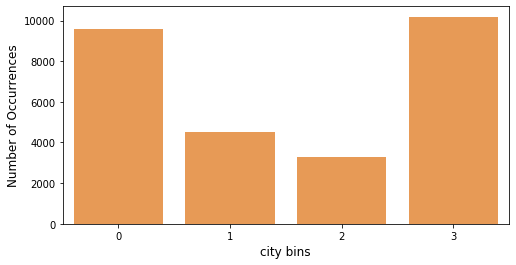

In [424]:
int_level = merged['city_y'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city bins', fontsize=12)
plt.show()

In [111]:
df['branch_code'].value_counts()

19      145
6       142
60      128
16      111
8       109
       ... 
3386      1
3418      1
4082      1
4050      1
2049      1
Name: branch_code, Length: 3185, dtype: int64

In [112]:
# Convert city variable wrt degree of number of customers
df['branch_bin'] = df['branch_code'].copy()
counts = df.branch_code.value_counts()
df.branch_bin[df['branch_code'].isin(counts[counts >= 100].index)] = 2
df.branch_bin[df['branch_code'].isin(counts[counts < 100].index) & df['branch_bin'].isin(counts[counts >= 50].index)] = 1
df.branch_bin[df['branch_code'].isin(counts[counts < 50].index)] = 0

df['branch_bin'] = pd.to_numeric(df['branch_bin'], errors='coerce')

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
df['branch_bin'].value_counts()

0    23237
1     4405
2      740
Name: branch_bin, dtype: int64

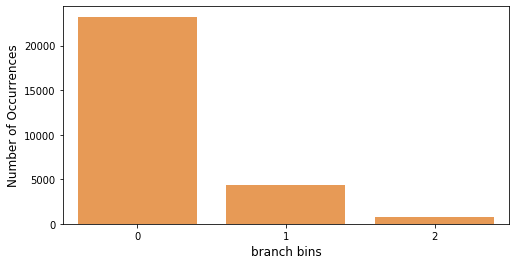

In [114]:
int_level = df['branch_bin'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('branch bins', fontsize=12)
plt.show()

So creating brackets/bins on the basis of frequency is a good idea to quickly analyse a variable with high number of categories

In [425]:
# Alternatively

bins= df["branch_code"].value_counts()
branch_bins = pd.cut(bins, [-1,50,100,4783], labels=[0,1,2])
merged = pd.merge(df, branch_bins, left_on="branch_code", right_index=True, how="left")
merged.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code_x,days_since_last_transaction,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,city_bin,branch_bin,branch_code_y
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0.0,0,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,NaN,0,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,3.0,1,1
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,3.0,0,0
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,1.0,0,0


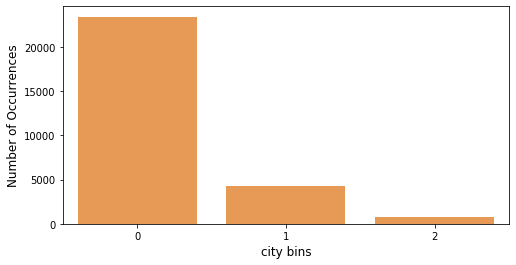

In [426]:
int_level = merged['branch_code_y'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city bins', fontsize=12)
plt.show()

Next, Let us look at some bivariate analysis for categorical variables

### Bivariate Analysis

Lets define a function to quickly compare churn rates for different categories in each feature

In [427]:
def barplot_percentages(feature):
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    ax1 = df.groupby(feature)['churn'].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True')
    int_level = df[feature].value_counts()

    plt.figure(figsize=(8,4))
    sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(str(feature), fontsize=12)
    plt.show()

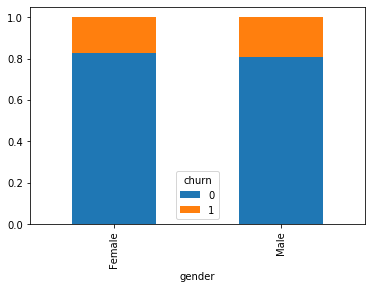

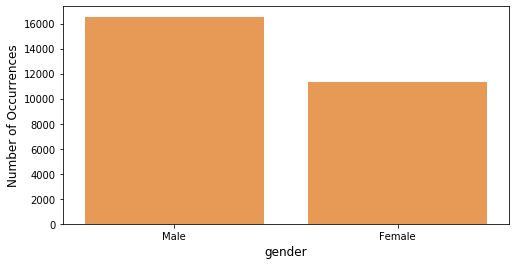

In [428]:
barplot_percentages("gender")

Does not look like a very significant variable as the ratio of churned customers and others is very similar

### Occupation

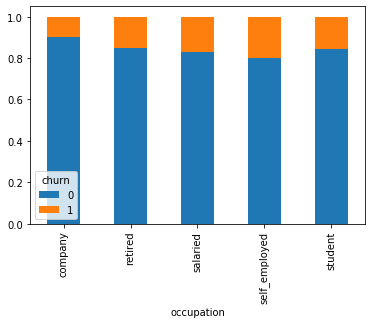

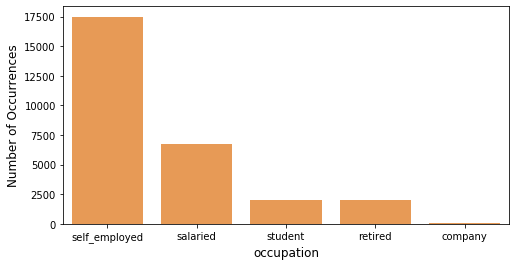

In [429]:
barplot_percentages("occupation")

In [445]:
pd.crosstab(df.occupation, df.churn, normalize=True, margins=True)

churn,0,1,All
occupation,,,
company,0.001272,0.000141,0.001413
retired,0.060738,0.010777,0.071514
salaried,0.196347,0.040527,0.236874
self_employed,0.494983,0.122500,0.617483
student,0.061268,0.011448,0.072716
All,0.814607,0.185393,1.000000


In [456]:
pd.crosstab(df.occupation, df.churn).apply(lambda r: r/r.sum(), axis=1)

churn,0,1
occupation,,
company,0.900000,0.100000
retired,0.849308,0.150692
salaried,0.828908,0.171092
self_employed,0.801614,0.198386
student,0.842566,0.157434


Self Employed and salaried have higher churn rate and are the major categories.

### Branch Bins

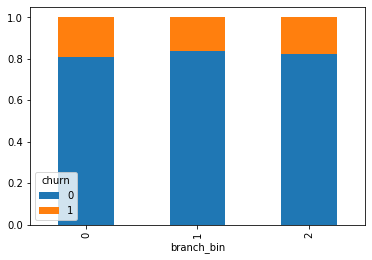

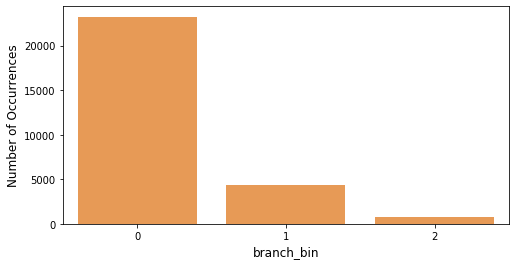

In [457]:
barplot_percentages("branch_bin")

### City Bins

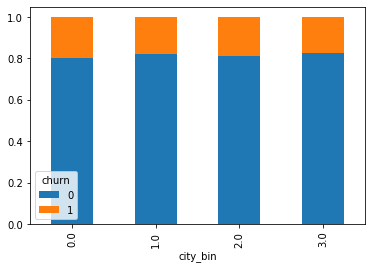

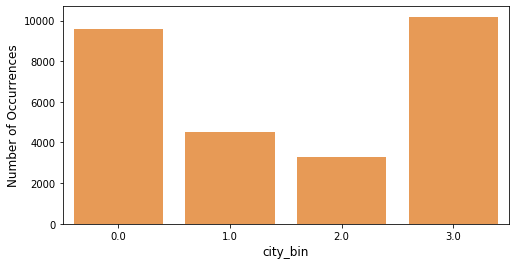

In [458]:
barplot_percentages("city_bin")

Here, we see significant difference for different occupations and certainly would be interesting to use as a feature for prediction of churn. However, city and branch codes have little difference amongst the different types of branches

### Dependents

In [460]:
df['dependents'][df['dependents'] > 3] = 3

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


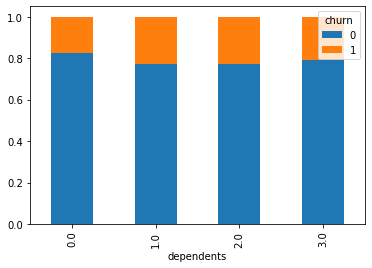

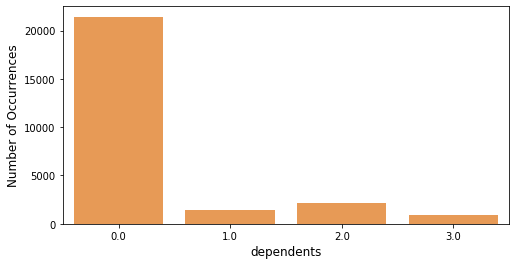

In [461]:
barplot_percentages("dependents")

Most customers have no dependents and hence this variable in itself has low variance so it is of little significance

### Customer Net worth Category

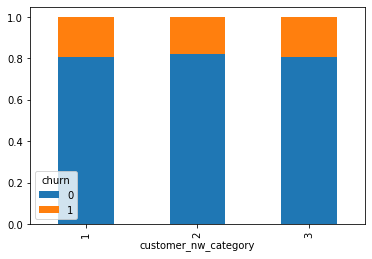

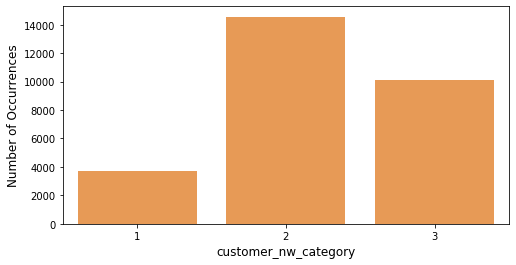

In [462]:
barplot_percentages("customer_nw_category")

Not much difference in customer net worth category when it comes to churn

### Correlation Heatmap

Lastly, we will look at the correlation heatmap to check what all variables are correlated and to what extent.

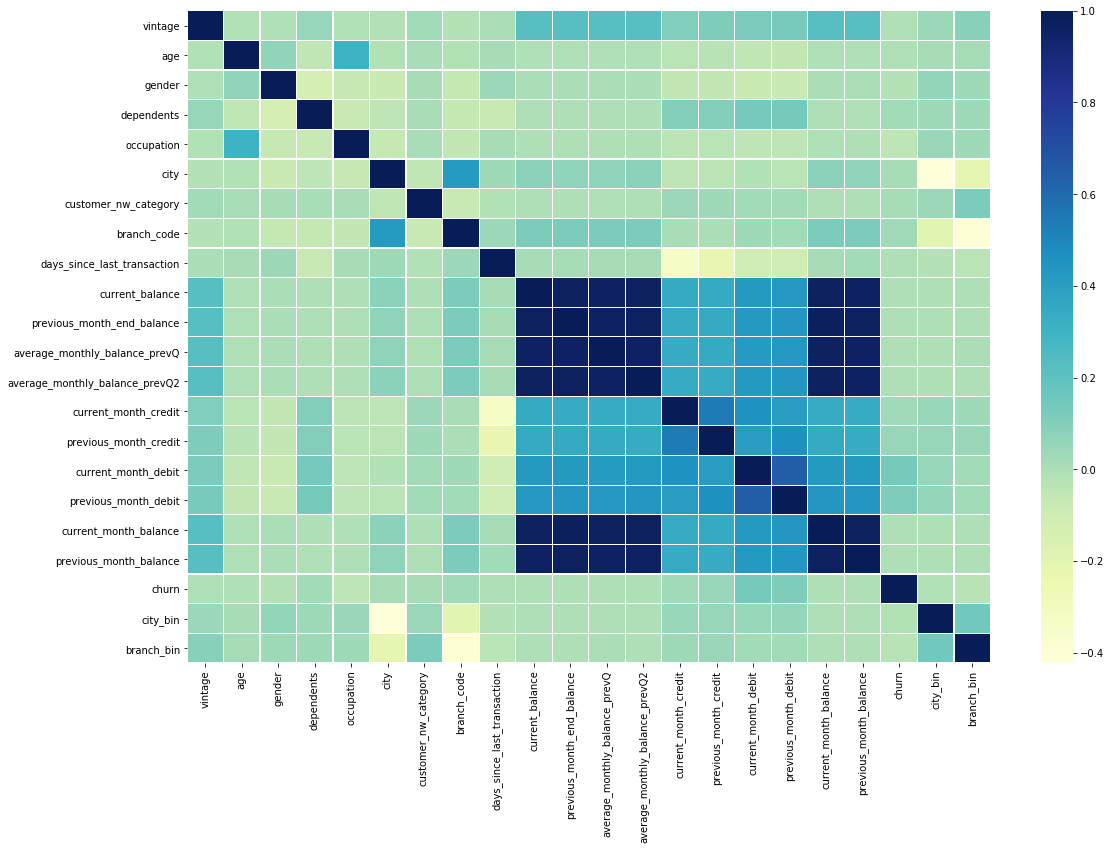

In [465]:
plt.figure(figsize=(18, 12))
df.drop(['customer_id'],
        axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

* The balance features are highly correlated as can be seen from the plot
* Other variables have correlations but on the lower side
* Debit values have the highest correlation amongst the balance features
* Interestingly vintage has a considerable correlation with all the balance features which actually makes sense since older customers will tend to have higher balance

### Conclusions

#### Average customer Profile
Overall a customer at this bank:
* has no dependents
* has been a customer for last 6 years
* predominantly male
* either self employed or salaried customer

#### Conclusion for Churn
* From the sample, around 18,5% customers are churning
* Current balance and average monthly balance values have a left skewed distribution as observed from the histogram
* No significant difference in distributions for average monthly balance and month end balances
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature
* For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 
* Gender does not look like a very significant variable as the ratio of churned customers and others is very similar
* Self Employed and salaried have higher churn rate and are the most frequently occuring categories.
* Not much difference in customer net worth category when it comes to churn

Source: www.analyticsvidhya.com